### Ce notebook récupère les données de simulation du modèle depuis "launch_simu_ss.py" pour en faire des visualisations.

Fréquence du dernier mode de corde calculé : 11636 Hz
Fréquence du dernier mode de plaque calculé : 8128 Hz


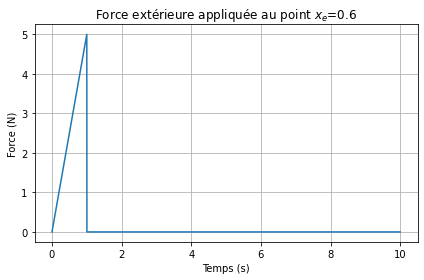

In [1]:
from guitare_config import *
from simu_config import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (12,4)

# Simulation

In [2]:
#Lance le calcul de la simulation
import launch_simu_ss

In [3]:
Q = launch_simu_ss.Q
#Mouvement de la corde
QS = Q[:NmS,:]
QB = Q[NmS:,:]

#Passage dans les coordonnées cartésiennes
simuS_NxS_Nt = phiS_Nx_NmS @ QS
simuB_NxNy_Nt = phiB_NxNy_NmB @ QB

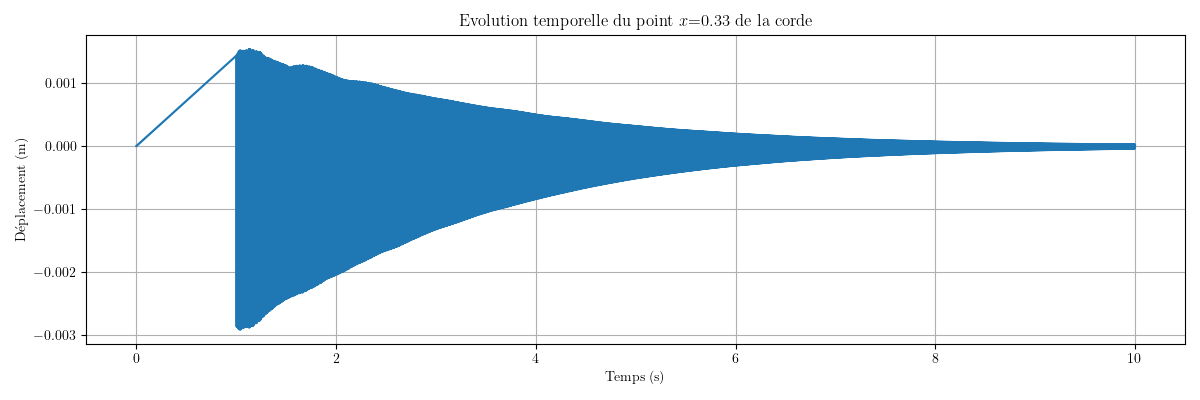

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(t, simuS_NxS_Nt[NxS//2,:],label="")
ax1.grid()
ax1.set_xlabel("Temps (s)")
ax1.set_ylabel("Déplacement (m)")
ax1.set_title(rf"Evolution temporelle du point $x$={xS[NxS//2]:.2f} de la corde")

fig.tight_layout()

plt.show()

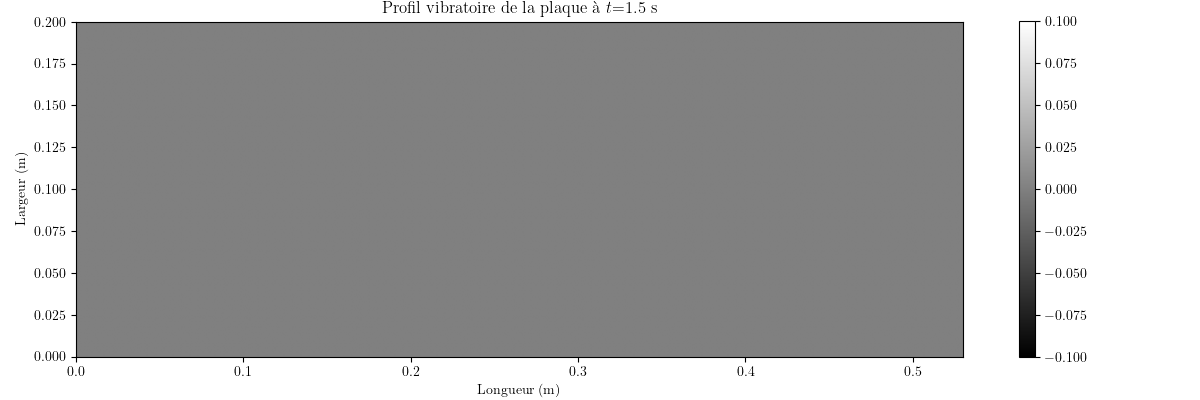

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

img = ax1.imshow(np.abs(simuB_NxNy_Nt[:,int(1.5*Fe)]).reshape((Nx,Ny)),
    extent=[x[0], x[-1] , y[0], y[-1]] ,
    cmap="jet",
    interpolation = "bilinear",
    # aspect="auto" ,
    origin="lower")

fig.colorbar(img,ax=ax1)
ax1.set_xlabel("Longueur (m)")
ax1.set_ylabel(r"Largeur (m)")
ax1.set_title(rf"Profil vibratoire de la plaque à $t$={t[int(1.5*Fe)]:.1f} s")

fig.tight_layout()

plt.show()

# Ecoute

In [9]:
from IPython.display import display, Audio

display(Audio(simuS_NxS_Nt[500,:], rate=Fe))

# Exportation des GIFs

MovieWriter PillowWriter unavailable; using Pillow instead.


Done ✅


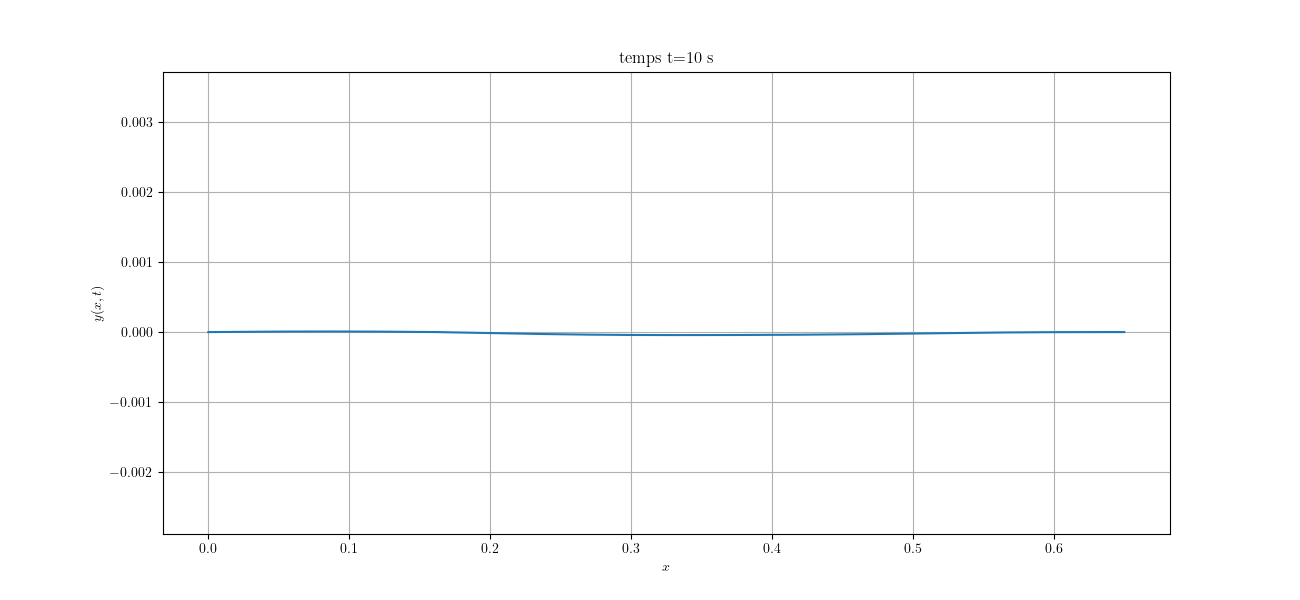

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x12702d250>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/tornado/ioloop.py", line 905, in _run
    return self.callback()
  File "/usr/local/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/usr/local/lib/python3.9/site-packages/matplotlib/animation.py", line 1408, in _step
    still_going = super()._step(*args)
  File "/usr/local/lib/python3.9/site-packages/matplotlib/animation.py", line 1107, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/usr/local/lib/python3.9/site-packages/matplotlib/animation.py", line 1126, in _draw_next_frame
    self._draw_frame(framedata)
  File "/usr/local/lib/python3.9/site-packages/matplotlib/animation.py", line 1720, in _draw_frame
    self._drawn_artists = self._func(framedata, 

In [7]:
#GIF CORDE
fe_anim = 15     #Hz

N_interval_anim = int(Fe/fe_anim)   #Nombre de points entre 0 et 1/fe_anim secondes

Ntanim = int(Nt/N_interval_anim)    #Nombre de points total de l'échantillonage visuel en fe_anim FPS
rms_Ntanim_NxS = np.zeros((Ntanim,NxS))
t_anim = np.zeros(Ntanim)
for i in range(Ntanim) :
    # rms_Ntanim_Nx[i,:] = np.sqrt(np.sum(np.square(xcorde_Nx_Nt[:,i*N_interval_anim:i*N_interval_anim+N_interval_anim-1]),axis=1))
    rms_Ntanim_NxS[i,:] = simuS_NxS_Nt[:,i*N_interval_anim]
    t_anim[i] = t[i*N_interval_anim]

rms_Nx_Ntanim = rms_Ntanim_NxS.T

fig = plt.figure(figsize=(13,6))
ax1 = fig.add_subplot(111)

line, = ax1.plot(xS,rms_Nx_Ntanim[:,0],label="")
ax1.grid()
# ax1.legend()
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y(x,t)$")
ax1.set_title(f"temps t={t_anim[0]}s")
ax1.set_ylim(np.min(rms_Nx_Ntanim),np.max(rms_Nx_Ntanim))

def init() :
    line.set_ydata(rms_Nx_Ntanim[:,0])
    line.set_xlim()
    ax1.set_title(f"temps t={t_anim[0]}s")
    return line,

def update(t_idx) :
    line.set_ydata(rms_Nx_Ntanim[:,t_idx])
    ax1.set_title(f"temps t={t_anim[t_idx]:.0f} s")
    return line,

import matplotlib.animation as animation

myAnimation = animation.FuncAnimation(fig, update, frames=Ntanim, interval=1/fe_anim, blit=True, repeat=False)
print("Done ✅")

myAnimation.save("figures/gif_corde.gif", writer='PillowWriter', fps=fe_anim)

MovieWriter PillowWriter unavailable; using Pillow instead.


Done ✅


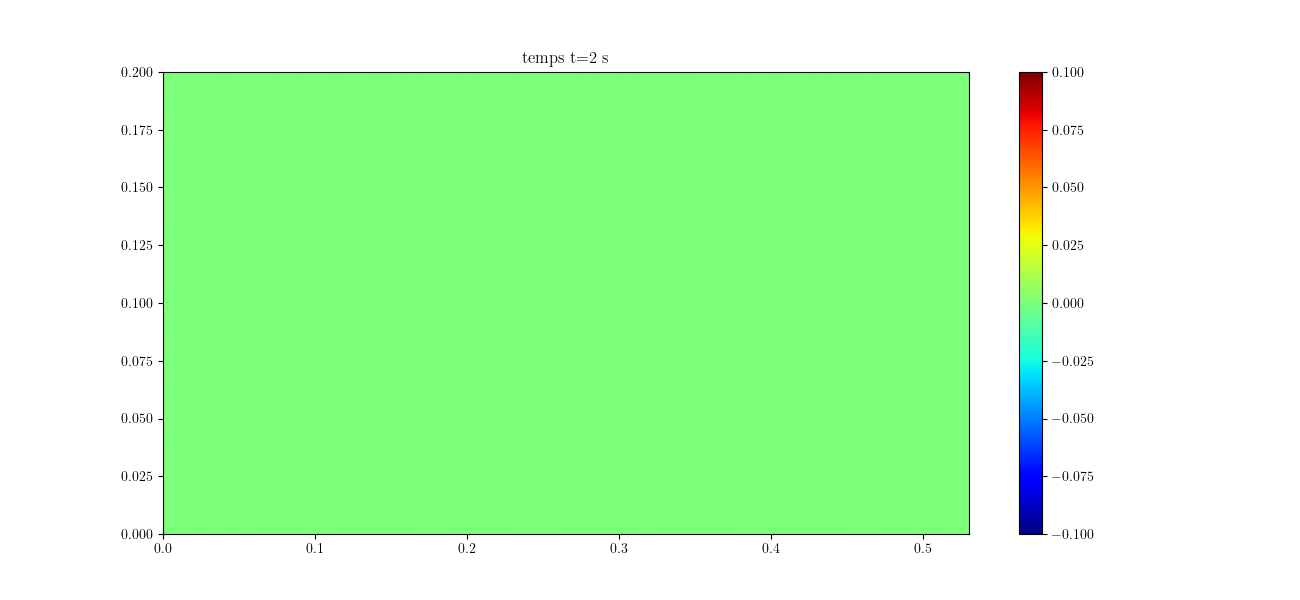

ERROR:tornado.application:Exception in callback <bound method TimerBase._on_timer of <matplotlib.backends.backend_webagg_core.TimerTornado object at 0x12702d250>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/tornado/ioloop.py", line 905, in _run
    return self.callback()
  File "/usr/local/lib/python3.9/site-packages/matplotlib/backend_bases.py", line 1198, in _on_timer
    ret = func(*args, **kwargs)
  File "/usr/local/lib/python3.9/site-packages/matplotlib/animation.py", line 1408, in _step
    still_going = super()._step(*args)
  File "/usr/local/lib/python3.9/site-packages/matplotlib/animation.py", line 1107, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/usr/local/lib/python3.9/site-packages/matplotlib/animation.py", line 1126, in _draw_next_frame
    self._draw_frame(framedata)
  File "/usr/local/lib/python3.9/site-packages/matplotlib/animation.py", line 1720, in _draw_frame
    self._drawn_artists = self._func(framedata, 

In [8]:
#GIF PLAQUE
fe_anim = 50     #Hz

N_interval_anim = int(Fe/fe_anim)   #Nombre de points entre 0 et 1/fe_anim secondes

Ntanim = int(2*Fe/N_interval_anim)    #Nombre de points total de l'échantillonage visuel en fe_anim FPS
rms_Ntanim_NxNy = np.zeros((Ntanim,Nx*Ny))
t_anim = np.zeros(Ntanim)
for i in range(Ntanim) :
    # rms_Ntanim_NxNy[i,:] = simuB_NxNy_Nt[:,i*N_interval_anim]
    rms_Ntanim_NxNy[i,:] = np.sqrt(np.sum(np.square(simuB_NxNy_Nt[:,i*N_interval_anim:i*N_interval_anim+N_interval_anim-1]),axis=1))
    t_anim[i] = t[i*N_interval_anim]

rms_NxNy_Ntanim = rms_Ntanim_NxNy.T

fig = plt.figure(figsize=(13,6))
ax1 = fig.add_subplot(111)

img = ax1.imshow(np.abs(rms_NxNy_Ntanim[:,0]).reshape((Nx,Ny)),
    extent=[x[0], x[-1] , y[0], y[-1]] ,
    cmap="jet" ,
    interpolation = "bilinear",
    aspect="auto" ,
    origin="lower")

fig.colorbar(img,ax=ax1)
ax1.set_xlabel("")
ax1.set_ylabel(r"")
ax1.set_title(r"")


def init() :
    img.set_data(np.abs(rms_NxNy_Ntanim[:,0]).reshape((Nx,Ny)))
    ax1.set_title(f"temps t={t_anim[0]}s")
    return [img]

def update(t_idx) :
    img.set_data(np.abs(rms_NxNy_Ntanim[:,t_idx]).reshape((Nx,Ny)))
    ax1.set_title(f"temps t={t_anim[t_idx]:.0f} s")
    img.set_clim([np.min(np.abs(rms_NxNy_Ntanim[:,:])),np.max(np.abs(rms_NxNy_Ntanim[:,:]))])
    return [img]

import matplotlib.animation as animation

myAnimation = animation.FuncAnimation(fig, update, frames=Ntanim, interval=1/fe_anim, blit=True, repeat=False)
print("Done ✅")

myAnimation.save("figures/gif_plaque.gif", writer='PillowWriter', fps=fe_anim/2)